In [1]:
#Step 1 : reading the rap song file

In [2]:
rap_song_file = open(r'./songs.txt','r', encoding='utf-8').read()
rap_song_file = rap_song_file.lower() # converting all the text to lower case

In [3]:
# step 2 : creating a markov_text object, which would be used to make sentences later

In [4]:
import markovify
markov_text = markovify.NewlineText(rap_song_file)

In [5]:
#step 3 : building bars from lyrics

### What is a bar in rap song:
- Usually one line of lyrics is one count, and there are 4 counts in a bar.  
- There are  16 bars in a verse in most rap songs.<br>

### An example of bar using a lyrics below:
I got a dream similar to dr king ===> 1 bar <br>
sept the whole world was smoking on that green ===> 2nd bar <br>
and the green team wouldn't be breaking up sales ===> 3rd bar <br>
they'd be breakin down the purple pulling out scales ==>4 bars <br>

##### Just to note : 4 of these = a verse

In [6]:
bars = rap_song_file.split('\n') # splitting out rap songs collection line by line

In [7]:
bars[15:18] # we see that there are some empty strings in the file

["you gon' see lawyers and niggas in jordans",
 '',
 'she said, "\'ye, can we get married at the mall?"']

In [8]:
# We need to remove the empty_strings in bar
empty_strings = 0
bars = list(filter(None, bars)) 

In [9]:
bars[15:18] # empty string have been removed

["you gon' see lawyers and niggas in jordans",
 'she said, "\'ye, can we get married at the mall?"',
 'i said, "look, you need to crawl \'fore you ball']

In [10]:
print(len(bars))

6191


In [11]:
# step 4 : subsituting the special characters with empty space and converting it into lowercase
import re
new_bars = []
for bar in bars:
    bar = re.sub('[^A-Za-z0-9\s]+', '', bar)
    new_bars.append(bar)
bars = new_bars

In [12]:
bars[15:18] # special characters have been removed

['you gon see lawyers and niggas in jordans',
 'she said ye can we get married at the mall',
 'i said look you need to crawl fore you ball']

In [13]:
# step 5 : Building the list of rhymes
import pronouncing

In [14]:
# conatins the last 2 characters of the most common rhymes words of all the last words in the bars
def rhyming_list_all(bars):
    rhyme_list_all = []
    rhyming_list_final = []
    for bar in bars:
        # taking the last word in each bar
        last_word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
        # finding the rhyming word for 'last_word'
        #print(last_word)
        rhyming_words = pronouncing.rhymes(last_word)
        #rhyming_words = [x.encode('UTF8') for x in rhyming_words]
        #print(rhyming_words)
        rhyming_words_ending = []
        for rhyming_word in rhyming_words:
            rhyming_words_ending.append(rhyming_word[-2:]) # this will pull the last 2 characters from each rhyming word
        #print(rhyming_words_ending)
        # now we see that which of the 2 characters in the rhyming_words_ending list occur the most
        # we used a try catch that if the rhyming word is not found then we will take the last 2 characters of the original word
        try:
            rhyming_words_ending_most_common = max(set(rhyming_words_ending), key = rhyming_words_ending.count)
        except Exception:
            rhyming_words_ending_most_common = last_word[-2:]
        #print(rhyming_words_ending_most_common)
        rhyme_list_all.append(rhyming_words_ending_most_common)
    # now taking the set of the list to get only unique last 2 characters
    #print('for loop ended')
    rhyme_list_all = list(set(rhyme_list_all))
    reverse_list = [x[::-1] for x in rhyme_list_all] #  using slicing syntax to reverse the letters[start,stop,step],
    #print(reverse_list)
    reverse_list = sorted(reverse_list)# sorting the characters
    #print(reverse_list)
    # now we will reverse the string again : this is done so that the words with the similar sounds can be taken in order
    rhyming_list_final =  [x[::-1] for x in reverse_list]
    return rhyming_list_final

In [15]:
rhyming_list_final = rhyming_list_all(bars)

In [16]:
print(len(rhyming_list_final)) # lenth of the common rhyming words used in the lyrics across all bars
print(rhyming_list_final)

266
['', "s'", '10', '30', '1', '11', '31', '12', '32', 'k2', '4', '5', '05', '25', '45', '55', '26', 'g6', '7', '8', '9', '99', 'a', 'aa', 'ba', 'ca', 'da', 'ga', 'ha', 'ia', 'ja', 'ka', 'la', 'ma', 'na', 'pa', 'ra', 'sa', 'ta', 'va', 'ya', 'za', 'ab', 'eb', 'ib', 'ob', 'ub', 'ac', 'fc', 'ic', 'nc', 'oc', 'ad', 'ed', 'id', 'ld', 'nd', 'od', 'rd', 'ud', 'be', 'ce', 'de', 'ee', 'fe', 'ge', 'he', 'ie', 'ke', 'le', 'me', 'ne', 'oe', 'pe', 're', 'se', 'te', 'ue', 've', 'ye', 'ze', 'af', 'ef', 'ff', 'if', 'lf', 'of', 'ag', 'eg', 'gg', 'ig', 'ng', 'og', 'rg', 'ug', 'ah', 'ch', 'gh', 'hh', 'oh', 'ph', 'sh', 'th', 'uh', 'ai', 'ci', 'gi', 'ii', 'ki', 'li', 'mi', 'ni', 'ri', 'ti', 'zi', 'pj', 'tj', 'ck', 'ek', 'lk', 'nk', 'ok', 'rk', 'sk', 'al', 'el', 'hl', 'il', 'll', 'ol', 'rl', 'tl', 'ul', 'xl', 'am', 'bm', 'em', 'im', 'lm', 'mm', 'om', 'rm', 'sm', 'um', 'an', 'en', 'gn', 'in', 'mn', 'nn', 'on', 'rn', 'un', 'wn', 'yn', 'ao', 'co', 'do', 'eo', 'fo', 'go', 'io', 'ko', 'lo', 'mo', 'no', 'oo', 'p

### What is a syllables:
- A syllable is a single, unbroken sound of a spoken (or written) word. Syllables usually contain a vowel and accompanying consonants <br>  
- EXAMPLE: Water has two syllables (wa / ter), Computer has three syllables (com / pu / ter)<br>

### why do we need syllables in rap song?:
- Counting syllables is an excellent skill <br>
- Important part of the structure of your rhymes is syllable structure<br>
- The syllables in each line will create a beat in your rap<br>
- Generally, by drawing out a line with too many syllables, or making a line too short with too few syllables, you can disrupt the beat of your rap<br>
- Avoid this by trying to balance rhyming lines to have the same number of beats<br>

### To note: 
- We are considering the maximun number of syllables for out rap song to be 16 in a line

In [17]:
#step 6 : we will count the syallables in a sentence
import syllables
def find_syllables_count(bar):
    return syllables.estimate(bar)/16 # average syllables count in a bar

In [18]:
# step 7: we would convert the index of our rhyming 2 character into float value
# we are doing the following steps to see that how close the rhyming words are each other
def index_rhyming_word_to_float(rhyming_list_final, bar):
    word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
    rhymeslist = pronouncing.rhymes(word)
    #rhymeslist = [x.encode('UTF8') for x in rhymeslist]
    rhymeslistends = []
    for i in rhymeslist:
        rhymeslistends.append(i[-2:])
    try:
        rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
    except Exception:
        rhymescheme = word[-2:]
    #print(len(rhymescheme))
    try:
        float_rhyme = rhyming_list_final.index(rhymescheme)
        float_rhyme = float_rhyme / float(len(rhyming_list_final))
        return float_rhyme
    except Exception:
        return None

In [19]:
# step 8 : combining the list of bars, syllables and float_rhyme_bar_list to a list

In [20]:
data_set = []
values_data_set = []
for bar in bars:
    values_data_set = [bar, find_syllables_count(bar), index_rhyming_word_to_float(rhyming_list_final, bar)]
    data_set.append(values_data_set)

In [21]:
data_set[:80]

[['let the suicide doors up', 0.4375, 0.6691729323308271],
 ['i threw suicides on the tour bus', 0.5625, 0.7819548872180451],
 ['i threw suicides on the private jet', 0.6875, 0.2857142857142857],
 ['you know what that mean im fly to death', 0.5625, 0.38345864661654133],
 ['i step in def jam buildin like im the shit', 0.75, 0.8233082706766918],
 ['tell em give me fifty million or ima quit', 0.8125, 0.8233082706766918],
 ['most rappers taste level aint at my waist level',
  0.8125,
  0.4699248120300752],
 ['turn up the bass til its upinyoface level', 0.8125, 0.4699248120300752],
 ['dont do no press but i get the most press kit', 0.6875, 0.8233082706766918],
 ['plus yo my bitch make your bitch look like precious',
  0.8125,
  0.7894736842105263],
 ['somethin bout mary she gone off that molly', 0.8125, 0.2593984962406015],
 ['now the whole party is melted like dal', 0.75, 0.46616541353383456],
 ['now everybody is movin they body', 0.75, 0.9210526315789473],
 ['dont sell me apartment ill mo

In [22]:
len(data_set)/4

1547.75

### What is a verse:
- Writing arranged with a metrical rhythm, typically having a rhyme <br>

### why do we need verse in rap song?:
- Verses are an important componenent of any song <br>
- The duration is usually 16 bars, but the verse may last 8 bars, 12 bars, or 24 bars.<br>
- As seen from the above patten, we will consider a verse of length 4<br>

##### Since our dataset is of the length 6191, if we divide it by 4, we would get a decimal number (1547.74), so we will round it off to a whole number by substracting 3 bars and then diving it by 4

In [23]:
new_length_data_set = len(data_set) -3
new_length_data_set/4

1547.0

In [24]:
# step 9 : creating the X and y for the lstm model

In [25]:
import numpy as np
X = []
y = []
for data in range(0, new_length_data_set):
    # this would create feature and labels as follows:
    # for example: if features ==> line 1, line 2, then labels ==> line 3, line 4
    # if features ==>  line 2, line 3, then labels ==> line4, line 5
    
    bar_1 = data_set[data][1:]
    bar_2 = data_set[data + 1][1:]
    bar_3 = data_set[data + 2][1:]
    bar_4 = data_set[data + 3][1:]
    #print(bar_1, bar_2, bar_3, bar_4)
    feature = [bar_1[0], bar_1[1], bar_2[0], bar_2[1]]
    label = [bar_3[0], bar_3[1], bar_4[0], bar_4[1]]
    #print(feature)
    #print(label)
    feature = np.array(feature)
    label = np.array(label)
    #print(feature)
    #print(label)   
    feature = feature.reshape(2,2)
    label = label.reshape(2,2)
    #print(feature)
    #print(label)  
    X.append(feature)
    y.append(label)
X = np.array(X)
y = np.array(y)

In [26]:
# step 9 : creating the lstm model for training
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense

Using TensorFlow backend.


In [27]:
model = Sequential()
model.add(LSTM(4, input_shape = (2,2), return_sequences = True)) #input_shape = (2,2) 2 timestpes, 2 features
#model.add(LSTM(8, return_sequences = True))
#model.add(LSTM(8, return_sequences = True))
#model.add(LSTM(8, return_sequences = True))
#model.add(LSTM(8, return_sequences = True))
model.add(LSTM(2, return_sequences = True))
model.summary()
model.compile(optimizer = 'rmsprop', loss = 'mse') # the optimizer function rmsprop: optimizes the gradient descent and the the loss function: mse: "mean_squared_error 

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 4)              112       
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 2)              56        
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


In [28]:
# fitting the model
model.fit(np.array(X), np.array(y), batch_size = 4, epochs = 10, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
6188/6188 [==============================] - 15s 2ms/step - loss: 0.1359
Epoch 2/10
6188/6188 [==============================] - 11s 2ms/step - loss: 0.0529
Epoch 3/10
6188/6188 [==============================] - 11s 2ms/step - loss: 0.0525
Epoch 4/10
6188/6188 [==============================] - 12s 2ms/step - loss: 0.0524
Epoch 5/10
6188/6188 [==============================] - 12s 2ms/step - loss: 0.0522
Epoch 6/10
6188/6188 [==============================] - 11s 2ms/step - loss: 0.0521
Epoch 7/10
6188/6188 [==============================] - 12s 2ms/step - loss: 0.0519
Epoch 8/10
6188/6188 [==============================] - 11s 2ms/step - loss: 0.0518
Epoch 9/10
6188/6188 [==============================] - 11s 2ms/step - loss: 0.0518
Epoch 10/10
6188/6188 [==============================] - 11s 2ms/step - loss: 0.0517


In [39]:
X = np.array([[10, 20], [40, 50]])
X_train = X.reshape(1, 2, 2) # X.reshape(samples, timesteps, features)\
model.predict(X_train)

array([[[0.76061106, 0.69235075],
        [0.8492973 , 0.84908754]]], dtype=float32)

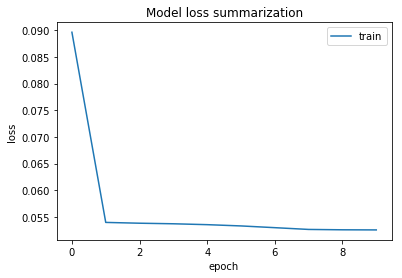

In [35]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(hisotry.history['loss'])
plt.title('Model loss summarization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [76]:
# step 10 : now we will generate new lyrics using markov chain


def generate_lyrics():
    bars_new_lyrics = []
    last_words = []
    lyriclength = len(bars)
    count = 0
    #markov_model = markov_text((". ").join('songs.txt') + ".")

    while len(bars_new_lyrics) < lyriclength / 9 and count < lyriclength * 2:
        # By default, the make_sentence method tries, a maximum of 10 times per invocation,
        # to make a sentence that doesn't overlap too much with the original text.
        # If it is successful, the method returns the sentence as a string.
        # If not, it returns None. (https://github.com/jsvine/markovify)
        bar = markov_text.make_sentence()
        #print(bar)
        # make sure the bar isn't 'None' and that the amount of
        # syllables is under the max syllables
        if type(bar) != type(None) and find_syllables_count(bar) < 1:

            # function to get the last word of the bar
            def get_last_word(bar):
                last_word = bar.split(" ")[-1]
                # if the last word is punctuation, get the word before it
                if last_word[-1] in "!.?,":
                    last_word = last_word[:-1]
                return last_word

            last_word = get_last_word(bar)
            # only use the bar if it is unique and the last_word
            # has only been seen less than 3 times
            if bar not in bars_new_lyrics and last_words.count(last_word) < 3:
                bars_new_lyrics.append(bar)
                last_words.append(last_word)
                count += 1

    return bars_new_lyrics

In [77]:
bars_new_lyrics = generate_lyrics()

In [78]:
# some of the newly generated using markov chain
bars_new_lyrics[:5]

['motherfucker, are you into astrology',
 'top 5 mcs: you gotta love it',
 'your a princess and you went raw dog when you die hard',
 "i'm pop the hood, ferrari",
 'tryna get the message']

In [79]:
print(len(bars_new_lyrics))

696


#### ----------------completed-----------------------------------------

In [80]:
rhyming_list_final_new_lyrics = rhyming_list_all(bars_new_lyrics)

In [81]:
rhyming_list_final_new_lyrics[:10]

['', "s'", '10', '26', '9', '99', 'ba', 'da', 'ga', 'ha']

In [83]:
print(len(rhyming_list_final_new_lyrics))

151


In [103]:
print(len(bars))

6263


In [140]:
import random
def compose_rap(lines, rhyme_list, model):
    rap_vectors = []
    human_lyrics = bars

    # choose a random line to start in from given lyrics
    initial_index = random.choice(range(len(human_lyrics) - 1))
    # create an initial_lines list consisting of 2 lines
    initial_lines = human_lyrics[initial_index:initial_index + 8]
    #print(initial_lines)
    starting_input = []
    for line in initial_lines:
        # appends a [syllable, rhyme_index] pair to starting_input
        #print(line)
        starting_input.append([find_syllables_count(line), index_rhyming_word_to_float(rhyme_list,line)])
    # predict generates output predictions for the given samples
    # it's reshaped as a (1, 2, 2) so that the model can predict each
    # 2x2 matrix of [syllable, rhyme_index] pairs
    starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(4, 2, 2))
    rap_vectors.append(starting_vectors)
    #print(rap_vectors)
    for i in range(32):
        rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(4, 2, 2)))

    return rap_vectors

In [141]:
rap_generated_with_prediction = compose_rap(bars_new_lyrics, rhyming_list_final_new_lyrics, model)

In [142]:
rap_generated_with_prediction

[array([[[0.74679714, 0.55679417],
         [0.7516534 , 0.5329634 ]],
 
        [[0.7144714 , 0.5354165 ],
         [0.72827846, 0.5217666 ]],
 
        [[0.7520766 , 0.5651813 ],
         [0.75773495, 0.5378867 ]],
 
        [[0.6893206 , 0.5236148 ],
         [0.73817784, 0.5272271 ]]], dtype=float32),
 array([[[0.7373452 , 0.5476445 ],
         [0.7299926 , 0.5216037 ]],
 
        [[0.7323134 , 0.5441451 ],
         [0.72188646, 0.5188657 ]],
 
        [[0.738231  , 0.54833525],
         [0.73178566, 0.5222803 ]],
 
        [[0.72686106, 0.54143935],
         [0.72154576, 0.5189476 ]]], dtype=float32),
 array([[[0.7359506 , 0.54655784],
         [0.7244995 , 0.5196739 ]],
 
        [[0.7352486 , 0.5460115 ],
         [0.7222534 , 0.5189361 ]],
 
        [[0.736076  , 0.5466557 ],
         [0.7249688 , 0.51983166]],
 
        [[0.73452127, 0.5454456 ],
         [0.7216489 , 0.5187408 ]]], dtype=float32),
 array([[[0.7357523 , 0.5464035 ],
         [0.723181  , 0.51923805]],
 
      

In [143]:
vectors_into_song(rap_generated_with_prediction, bars_new_lyrics, rhyming_list_final_new_lyrics)




About to write rap (this could take a moment)...



you think it's a different type of respect for is wiz
did you see the blood on the 18th birthday he found out it wasn't his?!
now he at least get a kanye beat, you'll never get rusty
or maybe they get money, money, money, money, money
you don't know where the party is melted like dalí
and i don't play pause i'm from a page of your body
but all good things gotta come to kill the hypocrisy
any rumor you ever fall off, it feel like o'shea
i don't listen to the world come to? i'm from chicago
action, i had my life like there's no tomorrow
cause we just doing what the hell was i supposed to do?
that's all i got, you still gotta live close to me though
awesome, the christian in christian dior with a nas flow
got tracks to go, tell me where they want to act moody!
we in the world come to? i'm from a tribe called quest
me and you ain't getting this type of dick from kanye west
i heard that? when i was looking at your history
somebody need 

["you think it's a different type of respect for is wiz",
 "did you see the blood on the 18th birthday he found out it wasn't his?!",
 "now he at least get a kanye beat, you'll never get rusty",
 'or maybe they get money, money, money, money, money',
 "you don't know where the party is melted like dalí",
 "and i don't play pause i'm from a page of your body",
 'but all good things gotta come to kill the hypocrisy',
 "any rumor you ever fall off, it feel like o'shea",
 "i don't listen to the world come to? i'm from chicago",
 "action, i had my life like there's no tomorrow",
 'cause we just doing what the hell was i supposed to do?',
 "that's all i got, you still gotta live close to me though",
 'awesome, the christian in christian dior with a nas flow',
 'got tracks to go, tell me where they want to act moody!',
 "we in the world come to? i'm from a tribe called quest",
 "me and you ain't getting this type of dick from kanye west",
 'i heard that? when i was looking at your history',
 

In [132]:
def vectors_into_song(vectors, generated_lyrics, rhyme_list):
    print ("\n\n")
    print("About to write rap (this could take a moment)...")
    print ("\n\n")

    # compare the last words to see if they are the same, if they are
    # increment a penalty variable which grants penalty points for being
    # uncreative
    def last_word_compare(rap, line2):
        penalty = 0
        for line1 in rap:
            word1 = line1.split(" ")[-1]
            word2 = line2.split(" ")[-1]

            # remove any punctuation from the words
            while word1[-1] in "?!,. ":
                word1 = word1[:-1]

            while word2[-1] in "?!,. ":
                word2 = word2[:-1]

            if word1 == word2:
                penalty += 0.2

        return penalty

    # vector_half is a single [syllable, rhyme_index] pair
    # returns a score rating for a given line
    def calculate_score(vector_half, syllables, rhyme, penalty):
        desired_syllables = vector_half[0]
        desired_rhyme = vector_half[1]
        # desired_syllables is the number of syllables we want
        desired_syllables = desired_syllables * 16
        # desired rhyme is the index of the rhyme we want
        desired_rhyme = desired_rhyme * len(rhyme_list)

        # generate a score by subtracting from 1 the sum of the difference between
        # predicted syllables and generated syllables and the difference between
        # the predicted rhyme and generated rhyme and then subtract the penalty
        score = 1.0 - (abs((float(desired_syllables) - float(syllables))) + abs(
            (float(desired_rhyme) - float(rhyme)))) - penalty

        return score

    # generated a list of all the lines from generated_lyrics with their
    # line, syllables, and rhyme float value
    dataset = []
    for line in generated_lyrics:
    
        line_list = [line, find_syllables_count(line), index_rhyming_word_to_float(rhyme_list,line)]
        dataset.append(line_list)

    rap = []

    vector_halves = []
    for vector in vectors:
        # vectors are the 2x2 rap_vectors (predicted bars) generated by compose_rap()
        # separate every vector into a half (essentially one bar) where each
        # has a pair of [syllables, rhyme_index]
        vector_halves.append(list(vector[0][0]))
        vector_halves.append(list(vector[0][1]))

    for vector in vector_halves:
        # Each vector (predicted bars) is scored against every generated bar ('item' below)
        # to find the generated bar that best matches (highest score) the vector predicted
        # by the model. This bar is then added to the final rap and also removed from the
        # generated lyrics (dataset) so that we don't get duplicate lines in the final rap.
        scorelist = []
        for item in dataset:
            # item is one of the generated bars from the Markov model
            line = item[0]

            if len(rap) != 0:
                penalty = last_word_compare(rap, line)
            else:
                penalty = 0
            # calculate the score of the current line
            total_score = calculate_score(vector, item[1], item[2], penalty)
            score_entry = [line, total_score]
            # add the score of the current line to a scorelist
            scorelist.append(score_entry)

        fixed_score_list = []
        for score in scorelist:
            fixed_score_list.append(float(score[1]))
        # get the line with the max valued score from the fixed_score_list
        max_score = max(fixed_score_list)
        for item in scorelist:
            if item[1] == max_score:
                # append item[0] (the line) to the rap
                rap.append(item[0])
                print(str(item[0]))

                # remove the line we added to the rap so
                # it doesn't get chosen again
                for i in dataset:
                    if item[0] == i[0]:
                        dataset.remove(i)
                        break
                break
    return rap


In [ ]:
rap = 

In [ ]:
rhyme_list_all_new_lyrics = [] # conatins the last 2 characters of the most common rhymes words of all the last words in the bars
for bar in bars_new_lyrics[:]:
    # taking the last word in each bar
    last_word = bar.split(' ')[-1]
    # finding the rhyming word for 'last_word'
    rhyming_words = pronouncing.rhymes(last_word)
    rhyming_words = [x.encode('utf-8') for x in rhyming_words]
    #print(rhyming_words)
    rhyming_words_ending = []
    for rhyming_word in rhyming_words:
        rhyming_words_ending.append(rhyming_word[-2:]) # this will pull the last 2 characters from each rhyming word
    #print(rhyming_words_ending)
    # now we see that which of the 2 characters in the rhyming_words_ending list occur the most
    # we used a try catch that if the rhyming word is not found then we will take the last 2 characters of the original word
    try:
        rhyming_words_ending_most_common = max(set(rhyming_words_ending), key = rhyming_words_ending )
    except Exception:
        rhyming_words_ending_most_common = last_word[-2:]
    #print(rhyming_words_ending_most_common)
    rhyme_list_all_new_lyrics.append(rhyming_words_ending_most_common)

In [ ]:
print(len(bars_new_lyrics)) # lenth of bars
print(len(rhyme_list_all_new_lyrics)) # length of rhymelist_all
print(rhyme_list_all_new_lyrics[:10]) # displaying the first 10 values in the 'rhyme_list_all_new_lyrics'

In [ ]:
# now taking the set of the list to get only unique last 2 characters
rhyme_list_all_new_lyrics = list(set(rhyme_list_all_new_lyrics))
print(len(rhyme_list_all_new_lyrics))

In [ ]:
reverse_list_new_lyrics = [x[::-1] for x in rhyme_list_all_new_lyrics] #  using slicing syntax to reverse the letters[start,stop,step],
reverse_list_new_lyrics = sorted(reverse_list_new_lyrics) # sorting the characters
# now we will reverse the string again : this is done so that the words with the similar sounds can be taken in order
rhyming_list_final_new_lyrics =  [x[::-1] for x in reverse_list_new_lyrics]

In [ ]:
# step 11 : composing rap using model
import random
starting_index = random.choice(range(len(bars_new_lyrics)-1)) # start with random index value in the new lyrics generated
starting_lines = bars_new_lyrics[starting_index:starting_index+ 8] # taking the next 8 lines in the bar after the starting index
starting_input = []

print(starting_lines)# random lines selected


In [ ]:
syallales_lines_new_lyrics = []
float_rhyme_bar_list = []

for bar in starting_lines: 
    #print(syllables.estimate(bar)/16)
    syallales_lines_new_lyrics.append(syllables.estimate(bar)/16)

#print(syallales_lines)

for bar in starting_lines:
    last_word_bar = bar.split(' ')[-1]
    rhyming_words_bar_new_lyrics = pronouncing.rhymes(last_word_bar)
    rhyming_words_bar_new_lyrics = [x.encode('utf-8') for x in rhyming_words_bar_new_lyrics]
    #print(rhyming_words_bar)
    rhyming_words_ending_bar = []
    for rhyming_word in rhyming_words_bar:
        rhyming_words_ending_bar.append(rhyming_words_bar_new_lyrics[-2:]) # this will pull the last 2 characters from each rhyming word
    #print(rhyming_words_ending_bar)
    # now we see that which of the 2 characters in the rhyming_words_ending list occur the most
    # we used a try catch that if the rhyming word is not found then we will take the last 2 characters of the original word
    try:
        rhyming_words_ending_most_common_bar = max(set(rhyming_words_ending_bar), key = rhyming_words_ending_bar )
    except Exception:
        rhyming_words_ending_most_common_bar = last_word_bar[-2:]
    #converts the index of the most common rhyme ending into a float
    #print(rhyming_words_ending_most_common_bar)
    #print('rhyming_list_final',rhyming_list_final)
    try:
        float_rhyme_bar = rhyming_list_final.index(rhyming_words_ending_most_common_bar) # gives the index of the our rhyming character in  the final list of all the rhyming 2 characters
        #print(float_rhyme_bar)
        float_rhyme_bar = float_rhyme_bar/float(len(rhyming_list_final))
        #print(float_rhyme_bar)
        float_rhyme_bar_list.append(float_rhyme_bar)# converts the value of the index in the range between 0 and 1
    except Exception:
        float_rhyme_bar_list.append(None)
print(float_rhyme_bar_list)
    

In [ ]:
data_set_new_lyrics = []
for i in range(len(starting_lines)):
    data_set_new_lyrics.append([syallales_lines_new_lyrics[i], float_rhyme_bar_list[i]])

In [ ]:
data_set_new_lyrics

In [ ]:
# this gives us predicted vector output for the randomly selected 8 lines
predicted_vectors = model.predict(np.array([data_set_new_lyrics]).flatten().reshape(4, 2, 2))
print(predicted_vectors)

In [ ]:
rap_vector = []
rap_vector.append(predicted_vectors)

In [ ]:
for i in range(100):
    rap_vector.append(model.predict(np.array([rap_vector[-1]]).flatten().reshape(4, 2, 2)))
#print(len(rap_vector))
print(rap_vector)

In [ ]:
# now we will try and conver these vector value with sentences

In [ ]:
vectors_into_song(rap_vector, bars_new_lyrics, float_rhyme_bar_list)